<a href="https://colab.research.google.com/github/potatosoupx/python/blob/main/PTB_Healthy_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#QRS Detection을 위한 데이터 정리
* 1000 sample로 cut
* QRS Detection을 위해 3000 sample까지 보기 (QRS위치 조정을 위해)
* filter 적용 후 plot 하기


In [1]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 30.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [3]:
import wfdb
import scipy.signal as signal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
Data= {
    1:
    pd.read_csv('/content/drive/MyDrive/Healthy/104/s0306lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    2:
    pd.read_csv('/content/drive/MyDrive/Healthy/105/s0303lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    3:
    pd.read_csv('/content/drive/MyDrive/Healthy/116/s0302lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[1000:4000,:],
    4:
    pd.read_csv('/content/drive/MyDrive/Healthy/117/s0292lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    5:
    pd.read_csv('/content/drive/MyDrive/Healthy/121/s0311lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    6:
    pd.read_csv('/content/drive/MyDrive/Healthy/122/s0312lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    7:
    pd.read_csv('/content/drive/MyDrive/Healthy/131/s0273lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    8:
    pd.read_csv('/content/drive/MyDrive/Healthy/150/s0287lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[1000:4000,:],
    9:
    pd.read_csv('/content/drive/MyDrive/Healthy/155/s0301lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[1000:4000,:],
    10:
    pd.read_csv('/content/drive/MyDrive/Healthy/156/s0299lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[1000:4000,:],
    11:
    pd.read_csv('/content/drive/MyDrive/Healthy/165/s0323lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    12:
    pd.read_csv('/content/drive/MyDrive/Healthy/166/s0275lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[1000:4000,:],
    13:
    pd.read_csv('/content/drive/MyDrive/Healthy/169/s0329lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[9000:12000,:],
    14:
    pd.read_csv('/content/drive/MyDrive/Healthy/170/s0274lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    15:
    pd.read_csv('/content/drive/MyDrive/Healthy/172/s0304lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    16:
    pd.read_csv('/content/drive/MyDrive/Healthy/173/s0305lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    17:
    pd.read_csv('/content/drive/MyDrive/Healthy/174/s0300lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    18:
    pd.read_csv('/content/drive/MyDrive/Healthy/180/s0475_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    19:
    pd.read_csv('/content/drive/MyDrive/Healthy/182/s0308lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[1000:4000,:],
    20:
    pd.read_csv('/content/drive/MyDrive/Healthy/184/s0363lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    21:
    pd.read_csv('/content/drive/MyDrive/Healthy/185/s0336lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[16000:19000,:],
    22:
    pd.read_csv('/content/drive/MyDrive/Healthy/198/s0415lre.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    23:
    pd.read_csv('/content/drive/MyDrive/Healthy/214/s0436_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    24:
    pd.read_csv('/content/drive/MyDrive/Healthy/229/s0452_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    25:
    pd.read_csv('/content/drive/MyDrive/Healthy/233/s0483_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    26:
    pd.read_csv('/content/drive/MyDrive/Healthy/234/s0460_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    27:
    pd.read_csv('/content/drive/MyDrive/Healthy/235/s0461_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    28:
    pd.read_csv('/content/drive/MyDrive/Healthy/236/s0463_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    29:
    pd.read_csv('/content/drive/MyDrive/Healthy/237/s0465_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    30:
    pd.read_csv('/content/drive/MyDrive/Healthy/238/s0466_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    31:
    pd.read_csv('/content/drive/MyDrive/Healthy/239/s0467_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    32:
    pd.read_csv('/content/drive/MyDrive/Healthy/240/s0468_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[2000:5000,:],
    33:
    pd.read_csv('/content/drive/MyDrive/Healthy/241/s0469_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    34:
    pd.read_csv('/content/drive/MyDrive/Healthy/242/s0471_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[2000:5000,:],
    35:
    pd.read_csv('/content/drive/MyDrive/Healthy/243/s0472_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    36:
    pd.read_csv('/content/drive/MyDrive/Healthy/244/s0473_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    37:
    pd.read_csv('/content/drive/MyDrive/Healthy/245/s0480_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    38:
    pd.read_csv('/content/drive/MyDrive/Healthy/246/s0478_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[11000:14000,:],
    39:
    pd.read_csv('/content/drive/MyDrive/Healthy/247/s0479_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    40:
    pd.read_csv('/content/drive/MyDrive/Healthy/248/s0481_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[5000:8000,:],
    41:
    pd.read_csv('/content/drive/MyDrive/Healthy/251/s0503_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    42:
    pd.read_csv('/content/drive/MyDrive/Healthy/252/s0487_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[26000:29000,:],
    43:
    pd.read_csv('/content/drive/MyDrive/Healthy/255/s0491_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[4000:7000,:],
    44:
    pd.read_csv('/content/drive/MyDrive/Healthy/260/s0496_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    45:
    pd.read_csv('/content/drive/MyDrive/Healthy/263/s0499_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    46:
    pd.read_csv('/content/drive/MyDrive/Healthy/264/s0500_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    47:
    pd.read_csv('/content/drive/MyDrive/Healthy/266/s0502_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    48:
    pd.read_csv('/content/drive/MyDrive/Healthy/267/s0504_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[:3000,:],
    49:
    pd.read_csv('/content/drive/MyDrive/Healthy/276/s0526_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[4000:7000,:],
    50:
    pd.read_csv('/content/drive/MyDrive/Healthy/277/s0527_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[1000:4000,:],
    51:
    pd.read_csv('/content/drive/MyDrive/Healthy/279/s0531_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[1000:4000,:],
    52:
    pd.read_csv('/content/drive/MyDrive/Healthy/284/s0552_re.csv',engine='python',header=0, names = ['i','ii','iii','avr','avl','avf','v1','v2','v3','v4','v5','v6','vx','vy','vz']).iloc[1000:4000,:]}

In [6]:
data={}

def data_set():
  for i in range (1,53):
    data[i]= pd.DataFrame(Data[i],columns = ['vx','vy','vz'], dtype = float).reset_index(drop=True)

data_set()

In [57]:
filter2={}

def HP_filter():
  sos1 = signal.butter(2, 0.1, 'high', fs=1000, output='sos')
  for a in range(1,53):
    filter2[a]= pd.DataFrame(signal.sosfilt(sos1, data[a]),columns = ['vx','vy','vz'], dtype = float)

HP_filter()

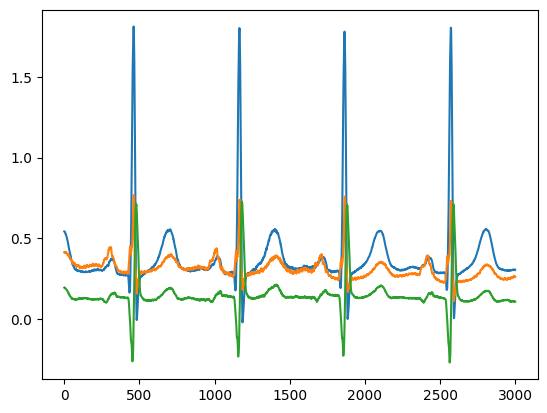

In [61]:
plt.plot(filter2[5]) #vx,vy,vz의 피크 지점 동일

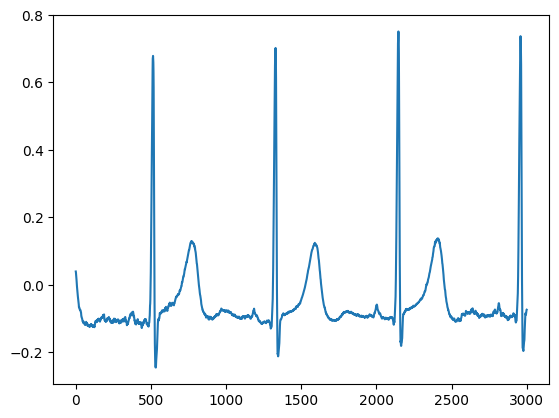

In [69]:
plt.plot(filter2[47]['vx'])

In [47]:
ecg_signal = np.array(filter2[1]['vx']) # 'ECG' 열의 데이터를 가져옴 하나만 측정
fs = 1000  # 샘플 레이트

In [67]:
from wfdb import processing
# XQRS 객체 생성 및 QRS 탐지
def detect():
  ecg_signal = {}
  for i in range (1,53):
    ecg_signal[i] = np.array(filter2[i]['vx'])
    xqrs = processing.XQRS(sig=ecg_signal[i], fs=fs)
    xqrs.detect()
    print("QRS 피크 위치:",[i],xqrs.qrs_inds)

detect()

Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.
QRS 피크 위치: [1] [ 792 1702 2615]
Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.
QRS 피크 위치: [2] []
Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.
QRS 피크 위치: [3] [1150 2119]
Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.
QRS 피크 위치: [4] [ 666 1533 2449]
Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.
QRS 피크 위치: [5] [ 461 1165 1864 2571]
Learning initial signal param

IndexError: arrays used as indices must be of integer (or boolean) type

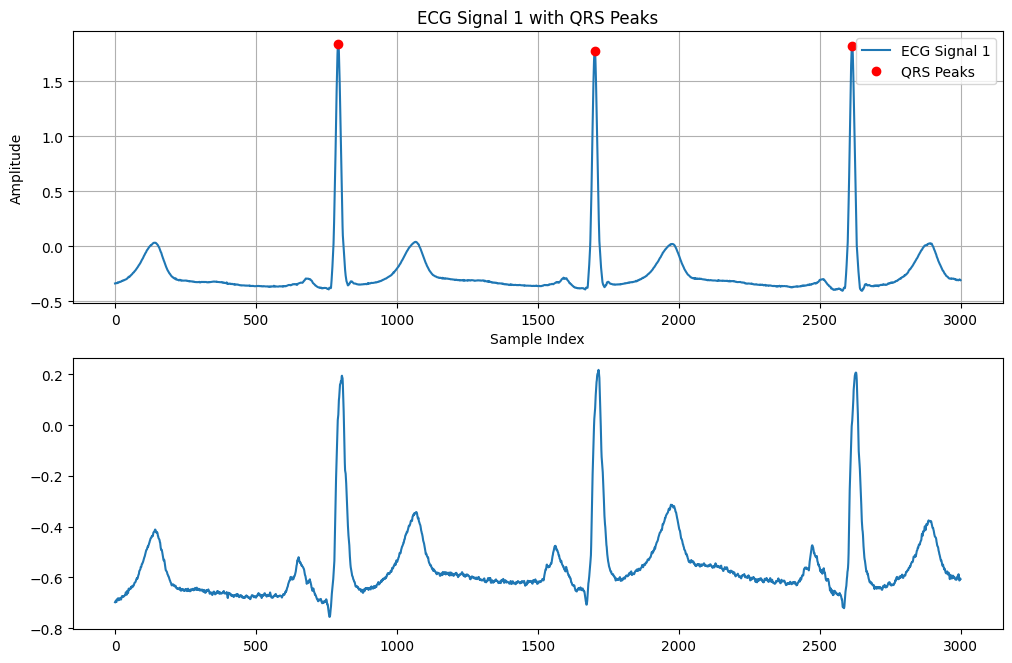

In [50]:
import matplotlib.pyplot as plt

# ECG 신호 리스트와 XQRS 객체 리스트
ecg_signals = [ecg_signal1, ecg_signal2, ecg_signal3]
xqrs_objects = [xqrs1, xqrs2, xqrs3]

# 서브플롯 생성
num_signals = len(ecg_signals)  # 신호 개수
plt.figure(figsize=(12, 4 * num_signals))  # 그래프 크기 설정

for i, (ecg_signal, xqrs) in enumerate(zip(ecg_signals, xqrs_objects)):
    # 각 신호에 대해 subplot 생성
    plt.subplot(num_signals, 1, i + 1)  # (전체 행, 전체 열, 현재 위치)
    plt.plot(ecg_signal, label=f'ECG Signal {i + 1}')  # ECG 신호
    plt.plot(xqrs.qrs_inds, ecg_signal[xqrs.qrs_inds], 'ro', label='QRS Peaks')  # QRS 피크
    plt.title(f'ECG Signal {i + 1} with QRS Peaks')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()  # 범례 추가
    plt.grid(True)  # 격자 추가

# 그래프 간 간격 조정
plt.tight_layout()
plt.show()

In [82]:
D={}
D[1]=filter2[1].iloc[1202:2202,:].reset_index(drop=True)
D[2]=filter2[3].iloc[650:1650,:].reset_index(drop=True)
D[3]=filter2[4].iloc[1033:2033,:].reset_index(drop=True)
D[4]=filter2[5].iloc[665:1665,:].reset_index(drop=True)
D[5]=filter2[6].iloc[1153:2153,:].reset_index(drop=True)
D[6]=filter2[7].iloc[1121:2121,:].reset_index(drop=True)
D[7]=filter2[8].iloc[715:1715,:].reset_index(drop=True)
D[8]=filter2[9].iloc[825:1825,:].reset_index(drop=True)
D[9]=filter2[11].iloc[1406:2406,:].reset_index(drop=True)
D[10]=filter2[12].iloc[1190:2190,:].reset_index(drop=True)
D[11]=filter2[14].iloc[1221:2221,:].reset_index(drop=True)
D[12]=filter2[15].iloc[1002:2002,:].reset_index(drop=True)
D[13]=filter2[17].iloc[862:1862,:].reset_index(drop=True)
D[14]=filter2[19].iloc[619:1619,:].reset_index(drop=True)
D[15]=filter2[25].iloc[1174:2174,:].reset_index(drop=True)
D[16]=filter2[27].iloc[964:1964,:].reset_index(drop=True)
D[17]=filter2[28].iloc[878:1878,:].reset_index(drop=True)
D[18]=filter2[29].iloc[728:1728,:].reset_index(drop=True)
D[19]=filter2[30].iloc[1587:2587,:].reset_index(drop=True)
D[20]=filter2[36].iloc[790:1790,:].reset_index(drop=True)
D[21]=filter2[37].iloc[1114:2114,:].reset_index(drop=True)
D[22]=filter2[38].iloc[896:1896,:].reset_index(drop=True)
D[23]=filter2[39].iloc[756:1756,:].reset_index(drop=True)
D[24]=filter2[40].iloc[1087:2087,:].reset_index(drop=True)
D[25]=filter2[42].iloc[1289:2289,:].reset_index(drop=True)
D[26]=filter2[46].iloc[937:1937,:].reset_index(drop=True)
D[27]=filter2[48].iloc[1225:2225,:].reset_index(drop=True)
D[28]=filter2[49].iloc[1248:2248,:].reset_index(drop=True)
D[29]=filter2[50].iloc[958:1958,:].reset_index(drop=True)
D[30]=filter2[51].iloc[842:1842,:].reset_index(drop=True)
D[31]=filter2[52].iloc[925:1925,:].reset_index(drop=True)

In [83]:
# 결과를 저장할 빈 DataFrame 생성
result = pd.DataFrame(columns=['vx_sum', 'vy_sum', 'vz_sum'])

# 0부터 1000번째 행까지 반복
for i in range(1000):
    # 각 i번째 행에서 vx, vy, vz 값을 합산
    vx_sum = sum(D[key].iloc[i]['vx'] for key in D.keys())
    vx_sum=vx_sum/52
    vy_sum = sum(D[key].iloc[i]['vy'] for key in D.keys())
    vy_sum=vy_sum/52
    vz_sum = sum(D[key].iloc[i]['vz'] for key in D.keys())
    vz_sum=vz_sum/52

    # 결과를 DataFrame의 새로운 행으로 추가
    result.loc[i] = [vx_sum, vy_sum, vz_sum]
    vx_sum=0
    vy_sum=0
    vz_sum=0


# 결과 확인 (예: 첫 번째 5개의 결과 출력)
print(result.head())

     vx_sum    vy_sum    vz_sum
0 -0.069508 -0.505050  0.054765
1 -0.069892 -0.504589  0.054957
2 -0.070363 -0.504636  0.055189
3 -0.070574 -0.505309  0.055362
4 -0.070719 -0.504598  0.055593


In [85]:
import plotly.graph_objects as go
import numpy as np

# Helix equation
t = np.linspace(0, 20, 100)
fig = go.Figure(data=[go.Scatter3d(
    x=result['vx_sum'],
    y=result['vy_sum'],
    z=result['vz_sum'],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

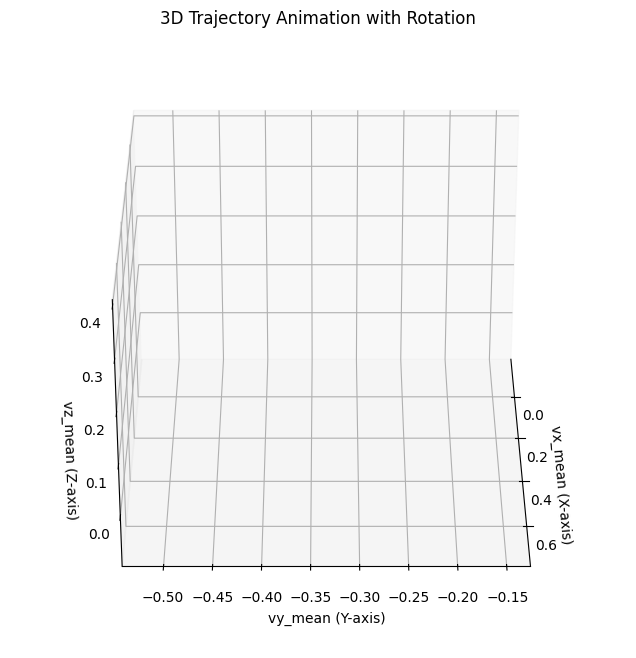

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation


# x, y, z 데이터 추출
x = result['vx_sum']
y = result['vy_sum']
z = result['vz_sum']

# 3D 플롯 초기화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 축 설정
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))
ax.set_zlim(min(z), max(z))
ax.set_xlabel("vx_mean (X-axis)")
ax.set_ylabel("vy_mean (Y-axis)")
ax.set_zlabel("vz_mean (Z-axis)")
ax.set_title("3D Trajectory Animation with Rotation")

# 궤적 초기화
line, = ax.plot([], [], [], lw=2, color='blue')  # 궤적 선

# 애니메이션 업데이트 함수
def update(num):
    # 궤적 업데이트
    line.set_data(x[:num], y[:num])  # x, y 데이터 업데이트
    line.set_3d_properties(z[:num])  # z 데이터 업데이트

    # 회전 추가
    ax.view_init(elev=30, azim=num)  # elev는 위아래, azim은 좌우 회전

    return line,

# 애니메이션 생성
ani = FuncAnimation(fig, update, frames=len(x), interval=30, blit=True)

# 애니메이션 표시
plt.show()

In [87]:
ani.save('3d_animation.gif', writer='pillow', fps=20)